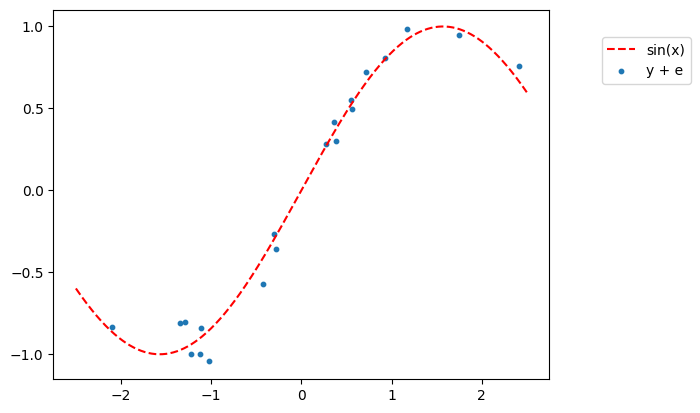

PyObject <matplotlib.legend.Legend object at 0x7ff640dc0a10>

In [233]:
using PyPlot
using Revise

n = 20
s = 0.08

a = -2.5
b = 2.5

x = rand(a:0.01:b, n)
y = sin.(x)

e = rand(Normal(0, s), n)
signal = y+e 

fig = figure()
d = collect(a:0.01:b)
plot(d, sin.(d), "r--", label ="sin(x)")
scatter(x,signal, s=10, label = "y + e")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)


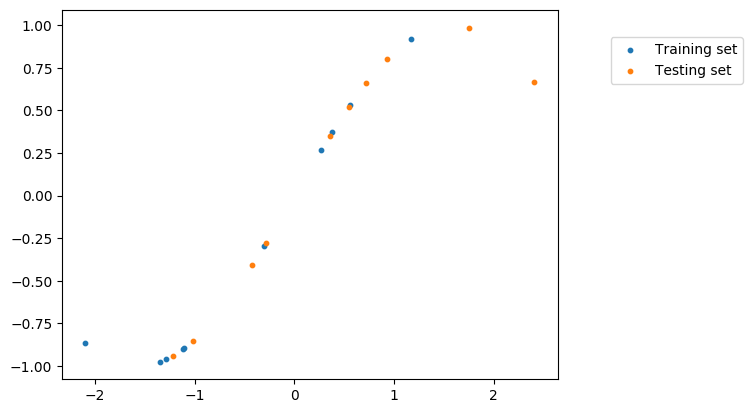

PyObject <matplotlib.legend.Legend object at 0x7ff640dba810>

In [234]:
ind = collect(1:n)

#ind_train = rand(1:n, Int(n/2))
ind_train = sample(1:n, Int(n/2), replace = false)
ind_test = setdiff(ind, ind_train)
x_train = x[ind_train]
x_test = x[ind_test]
y_train = y[ind_train]
y_test = y[ind_test]


fig = figure()
scatter(x_train,y_train, s=10, label = "Training set")
scatter(x_test,y_test, s=10, label = "Testing set")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)

In [231]:
function P( w, x, d)
    res = zeros(size(x))

    for i=1:size(x)[1]
        for j=1:d
            res[i] = res[i] + w[j]*x[i]^(j-1)
        end
    end
    return res
end


function grad(x,y,w,d)
    g = zeros(d)
    
    dif = (P(w,x,d) .- y)
    
    for j=1:d
        for i =1:size(x)[1]
            g[j] = g[j] + dif[i]*x[i]^(j-1)
        end
    end
    
    return g, sum(dif)
end

function grad_descend(x, w0, d, step)
    i = 0
    g_norm = 1.0    
    while i<1.0e9 && g_norm > 0.1
        
        i=i+1
        g, loss = grad(x,y,w0,d)
        w1 = w0 - step.*g
        
        w0 = w1
        g_norm = sqrt(sum(g.*g))
        
        if mod(i, 1.0e6)==0
            println("iter = ", i)
            println("  w = ", w0)
            println("  loss = ", loss)
            println("g norm = ", g_norm)
            println()
        end
    end 
    
    return w0
end




grad_descend (generic function with 2 methods)

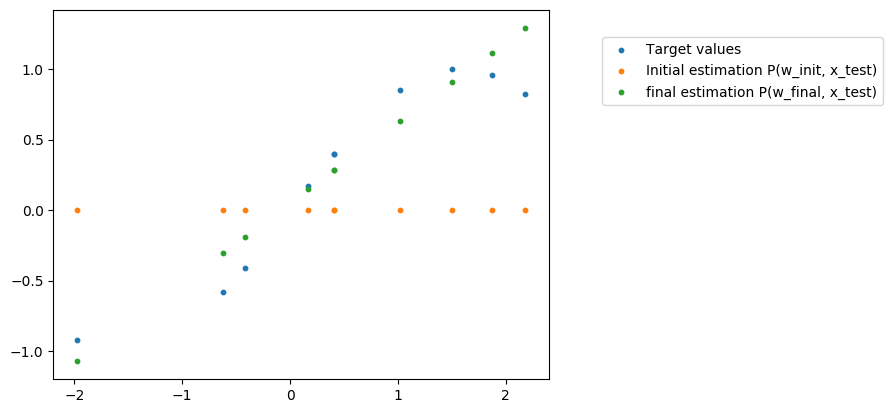

iter = 1000000
  w = [0.03082954158244712, 0.17214444649225108]
  loss = -2.453333411859701
g norm = 14.546720903886932

iter = 2000000
  w = [0.049861653893383664, 0.292265628788752]
  loss = -1.4264387636751419
g norm = 10.056537867094011

iter = 3000000
  w = [0.06056483051438047, 0.3757256693662306]
  loss = -0.7633599172065169
g norm = 6.964735953858958

iter = 4000000
  w = [0.06593509109253037, 0.4338164142881964]
  loss = -0.34342630103775973
g norm = 4.83575094166169

iter = 5000000
  w = [0.06796808331032249, 0.47433418597979876]
  loss = -0.08478071497387746
g norm = 3.369624180832498

iter = 6000000
  w = [0.06798189564729264, 0.5026648384197338]
  loss = 0.06791452675723686
g norm = 2.359761494086478

iter = 7000000
  w = [0.06683745195883774, 0.5225314961839322]
  loss = 0.15190832631979967
g norm = 1.6638462246052779

iter = 8000000
  w = [0.06508869888321488, 0.5365099245764111]
  loss = 0.1921372439010402
g norm = 1.1838132102876886

iter = 9000000
  w = [0.06308471308

PyObject <matplotlib.legend.Legend object at 0x7ff640e54510>

In [232]:
# d = pocet clenu v polynomu ... stupen + 1, w_init = pocatecni odhad do gradientniho sestupu

d = 2
w_init = rand(-0.001:0.001, d)
y_init = P(w_init, x_train, d)


#fig = figure()
#scatter(x_train, y_train, s=10, label = "Target values")
#scatter(x_train, y_init, s=10, label = "Initial estimation P(w_init, x_test)")
#legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)

####################################################################################

w_final = grad_descend(x, w_init, d, 1.0e-8)
println("w final = ", w_final)

y_final = P(w_final, x_train, d)
println("y final = ", y_final)

fig = figure()
scatter(x_train, y_train, s=10, label = "Target values")
scatter(x_train, y_init, s=10, label = "Initial estimation P(w_init, x_test)")
scatter(x_train, y_final, s=10, label = "final estimation P(w_final, x_test)")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)

